In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

from keras.preprocessing import image
from keras.models import load_model



### đọc và nhập tập dữ liệu hình ảnh 

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory("Data//train//",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))     

validation_generator =  test_datagen.flow_from_directory( "Data//validation//",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### neural network

In [ ]:
from keras.optimizers import Adam
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(128, 128, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
   )

hist = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator.filenames) // 256,
                    validation_steps=len(validation_generator.filenames) // 256,
                    epochs=50)

#save model
model.save("model.h5")

In [15]:
#print loss and accuracy
print("accuracy = "+str(round(hist.history['accuracy'][-1],4)*100)+" %")
print("loss = "+str(round(hist.history['loss'][-1],4)*100)+" %")


accuracy = 52.07000000000001 %
loss = 1278.6 %


### retraining the model

In [3]:
# #retrain model
# model = tf.keras.models.load_model("model.h5")
# model.fit(train_generator,
#                     validation_data=validation_generator,
#                     steps_per_epoch=len(train_generator.filenames) // 256,
#                     validation_steps=len(validation_generator.filenames) // 256,
#                     epochs=50)

# #save model
# model.save("model.h5")
#train model and auto save after each epoch
model = tf.keras.models.load_model("model.h5")
hist = model.fit(train_generator,
        validation_data=validation_generator,
        steps_per_epoch=len(train_generator.filenames) // 256,
        validation_steps=len(validation_generator.filenames) // 256,
        epochs=100,  
        callbacks=[
                tf.keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True, monitor='val_loss', mode='auto'),
                tf.keras.callbacks.CSVLogger('hist.csv', separator=",", append=True)]
        )
#save model
# model.save("model.h5")



Epoch 1/100
31/31 [==============================] - 96s 3s/step - loss: 0.3059 - accuracy: 0.8676 - val_loss: 0.5240 - val_accuracy: 0.7885
Epoch 2/100
31/31 [==============================] - 87s 3s/step - loss: 0.3141 - accuracy: 0.8633 - val_loss: 0.5143 - val_accuracy: 0.7718
Epoch 3/100
31/31 [==============================] - 84s 3s/step - loss: 0.2901 - accuracy: 0.8774 - val_loss: 0.5944 - val_accuracy: 0.7835
Epoch 4/100
31/31 [==============================] - 84s 3s/step - loss: 0.3038 - accuracy: 0.8721 - val_loss: 0.5707 - val_accuracy: 0.7824
Epoch 5/100
31/31 [==============================] - 84s 3s/step - loss: 0.2987 - accuracy: 0.8768 - val_loss: 0.5353 - val_accuracy: 0.7684
Epoch 6/100
31/31 [==============================] - 85s 3s/step - loss: 0.3095 - accuracy: 0.8676 - val_loss: 0.5079 - val_accuracy: 0.7801
Epoch 7/100
31/31 [==============================] - 84s 3s/step - loss: 0.2928 - accuracy: 0.8778 - val_loss: 0.5161 - val_accuracy: 0.7773
Epoch 8/100
3

In [3]:
hist = pd.read_csv("hist.csv")
#print accuracy and loss the last epoch
print("accuracy = "+str(round(hist['accuracy'].iloc[-1],4)*100)+" %")
print("loss = "+str(round(hist['loss'].iloc[-1],4)*100)+" %")

accuracy = 93.13 %
loss = 17.560000000000002 %


### kiểm tra model hoạt động

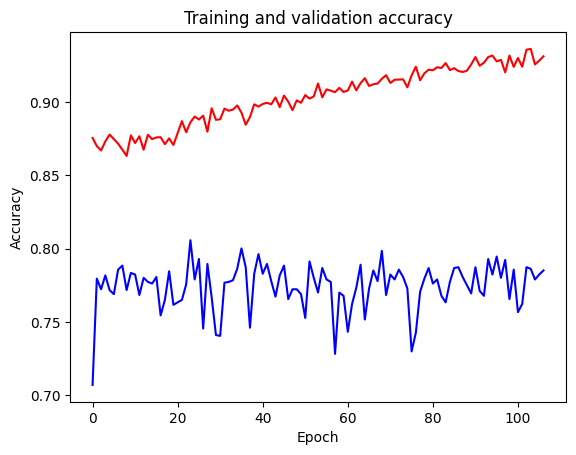

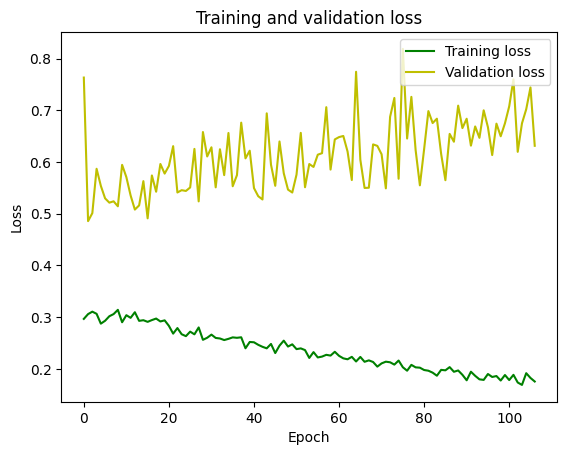

<Figure size 640x480 with 0 Axes>

In [5]:
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend(loc=1)
plt.figure()
plt.show()

### test thực tế

1/1 [==============================] - 0s 292ms/step
[1.8640136e-34]
cat


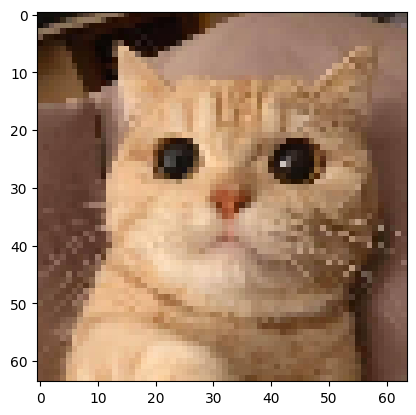

In [6]:
#test model check cat or dog

model = load_model('model.h5')
img = keras.utils.load_img('Data\\test1\\cat1.jpg', target_size=(64, 64))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=256)
print(classes[0])
if classes[0]>0.5:
    print("dog")
else:
    print("cat")

plt.imshow(img)
